<a href="https://colab.research.google.com/github/rajan-dhinoja/Multiple_Disease_Prediction/blob/main/notebook_files/Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Classification Template**
---



# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [46]:
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

print("✅ Required Libraries are Imported - Done!\n")

✅ Required Libraries are Imported - Done!



## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [47]:
# dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets/CLASSIFICATION/Multiple_Diseases/kidney.csv'))
dataset = pd.DataFrame(pd.read_csv('../datasets/kidney.csv'))
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


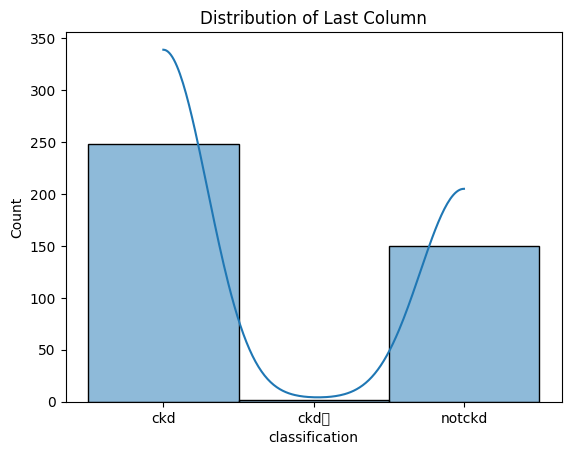

In [48]:
# plt.figure(figsize=(10, 6))
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

In [49]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

if categorical_cols.empty:
  print("❌ No Categorical Columns Found...")
else:
  print("✅ Categorical Columns found: \n", categorical_cols, "\n")

if numerical_cols.empty:
  print("❌ No Numerical Columns Found...")
else:
  print("✅ Numerical Columns found: \n", numerical_cols)

✅ Categorical Columns found: 
 Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object') 

✅ Numerical Columns found: 
 Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')


In [50]:
print("> Shape of the Dataset: ", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
# print(dataset.describe().map(lambda x: round(x, 4)))
print(dataset.describe().to_string(header=True))

> Shape of the Dataset:  (400, 26) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv           

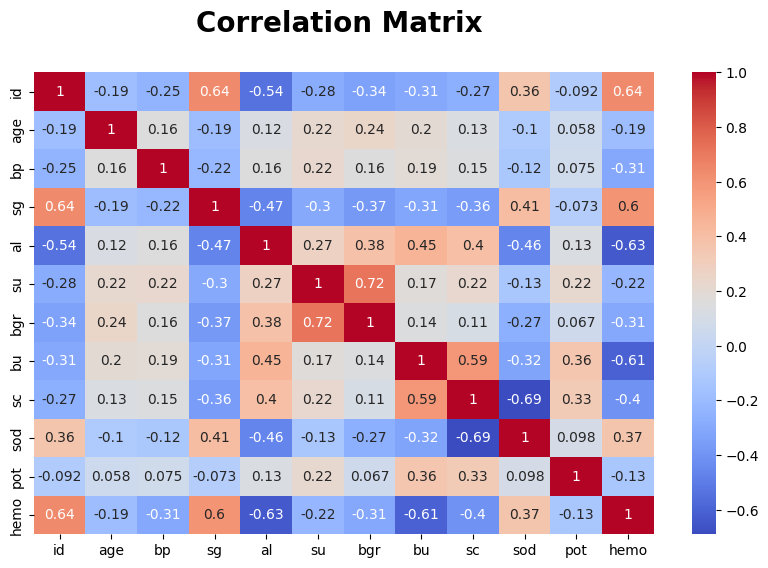

In [51]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [52]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("✅ Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("❌ No Duplicate Data(or Identical Rows) found...")

❌ No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [53]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("⚠️ Missing Data Found! Handling them...\n")
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)
      print("\n")

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])
      print("✅ Missing Data Handled Successfully...")
      # print("New Data with replaced missing values: \n", dataset.head(10).to_string(header=True))
else:
    print("❌ No missing data found...")



⚠️ Missing Data Found! Handling them...

Missing Data Counts in Categorical Columns: 
 rbc               152
pc                 65
pcc                 4
ba                  4
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


Missing Data Counts in Numerical Columns: 
 id       0
age      9
bp      12
sg      47
al      46
su      49
bgr     44
bu      19
sc      17
sod     87
pot     88
hemo    52
dtype: int64


✅ Missing Data Handled Successfully...


### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [54]:
for col in dataset.columns:
  value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

  print(f"Column: \t\t'{col}'")
  print(value_counts_dataset.T.to_string(header=False), "\n")

Column: 		'id'
Unique Values:  0.00 263.00 273.00 272.00 271.00 270.00 269.00 268.00 267.00 266.00 265.00 264.00 262.00 1.00 261.00 260.00 259.00 258.00 257.00 256.00 255.00 254.00 253.00 252.00 274.00 275.00 276.00 277.00 298.00 297.00 296.00 295.00 294.00 293.00 292.00 291.00 290.00 289.00 288.00 287.00 286.00 285.00 284.00 283.00 282.00 281.00 280.00 279.00 278.00 251.00 250.00 249.00 224.00 222.00 221.00 220.00 219.00 218.00 217.00 216.00 215.00 214.00 213.00 212.00 211.00 210.00 209.00 208.00 207.00 206.00 205.00 204.00 203.00 202.00 223.00 225.00 248.00 226.00 247.00 246.00 245.00 244.00 243.00 242.00 241.00 240.00 239.00 238.00 237.00 236.00 235.00 234.00 233.00 232.00 231.00 230.00 229.00 228.00 227.00 299.00 300.00 301.00 375.00 373.00 372.00 371.00 370.00 369.00 368.00 367.00 366.00 365.00 364.00 363.00 362.00 361.00 360.00 359.00 358.00 357.00 356.00 355.00 354.00 353.00 374.00 376.00 351.00 377.00 398.00 397.00 396.00 395.00 394.00 393.00 392.00 391.00 390.00 389.00 388.00 

In [55]:
for col_index in [-1, -5, -6]:
    col = dataset.columns[col_index]  # Get the column name
    dataset[col] = dataset[col].str.replace(r'(\tckd|ckd\t|\tyes|yes\t|\tno|no\t)', lambda x: x.group(1).strip(), regex=True)
    print(f"Column: {col}")  # Print the column name
    print(dataset.iloc[:, col_index].value_counts().reset_index(name='Counts'), "\n")

print("✅ Synonyms replaced Successfully...\n")

Column: classification
  classification  Counts
0            ckd     250
1         notckd     150 

Column: cad
   cad  Counts
0   no     366
1  yes      34 

Column: dm
     dm  Counts
0    no     263
1   yes     136
2   yes       1 

✅ Synonyms replaced Successfully...



### Step-3.4: Checking for Stopwords and Stemming them:-

In [56]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

# if categorical_cols.any():

#   nltk.download('stopwords')

#   stop_words = set(stopwords.words('english'))
#   # stop_words = stop_words.remove('not')
#   # print("\n Stop Words are: ", stop_words, "\n")
#   def stemming(text):
#       words = text.lower().split()

#       stemmer = PorterStemmer()
#       stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
#       return ' '.join(stemmed_words)  # Join stemmed words back into a string

#   # Apply the stemming function to the specified columns
#   for column in categorical_cols:
#       dataset[column] = dataset[column].astype(str).apply(stemming)

#   print("✅ Stemming Completed Successfully... \n")
#   # print(dataset.head().to_string(header=True))
# else:
#   print("❌ No Stemming Needed...")

### Step-3.5: Checking any Categorical Data and Encoding them:-

In [57]:
import scipy.sparse
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.iloc[:, :-1]
# input_features = X.copy()
y = dataset.iloc[:, -1]

repeating_cols = []

if categorical_cols.empty:
  print("❌ No Encoding needed! No Categorical Columns found...")
else:
  for col in categorical_cols:
      # Matrix of Feature
      if col != y.name:
        print(f"> String Values present in Column '{col}'.")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          repeating_cols.append(col)
          # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
          print(f"\t- Also, Categorical values found in column '{col}'.")
          print(f"\t✅ '{col}' is Encoded Successfully...\n")

        else:
          print(f"\t❌ But No Categorical values found in column '{col}'.\n")

      # Dependent Variable/Output
      if col == y.name:
        print(f"> String Values present in Column '{col}'(Output Column).")
        # Check for repeating values within the categorical column
        value_counts = dataset[col].value_counts()
        repeating_values = value_counts[value_counts > 1].index.tolist()
        if repeating_values:
          # print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
          print(f"\t- Also, Categorical values found in column '{col}'.")
          le = LabelEncoder()
          y = le.fit_transform(dataset[col])
          print(f"\t✅ '{col}' is Encoded Successfully...\n")
        else:
          print(f"\t❌ But No Categorical values found in column '{col}'.\n")

  print("=> Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")
  if repeating_cols:
    encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
    encoder_transform = encoder.fit_transform(X)

    # Conditional conversion to dense array
    if scipy.sparse.issparse(encoder_transform):  # Check if sparse
      X = encoder_transform.toarray()
    else:
      X = encoder_transform

  else:
    print("❌ No Repeating Columns found in Matrix of Features(X). \n")

  # print("Matrix of Features(X): \n", pd.DataFrame(X).head().to_string(header=True))
  # print("\n")
  # print("Dependent Variable(y): \n", pd.DataFrame(y).head().to_string(header=False, index=False))


> String Values present in Column 'rbc'.
	- Also, Categorical values found in column 'rbc'.
	✅ 'rbc' is Encoded Successfully...

> String Values present in Column 'pc'.
	- Also, Categorical values found in column 'pc'.
	✅ 'pc' is Encoded Successfully...

> String Values present in Column 'pcc'.
	- Also, Categorical values found in column 'pcc'.
	✅ 'pcc' is Encoded Successfully...

> String Values present in Column 'ba'.
	- Also, Categorical values found in column 'ba'.
	✅ 'ba' is Encoded Successfully...

> String Values present in Column 'pcv'.
	- Also, Categorical values found in column 'pcv'.
	✅ 'pcv' is Encoded Successfully...

> String Values present in Column 'wc'.
	- Also, Categorical values found in column 'wc'.
	✅ 'wc' is Encoded Successfully...

> String Values present in Column 'rc'.
	- Also, Categorical values found in column 'rc'.
	✅ 'rc' is Encoded Successfully...

> String Values present in Column 'htn'.
	- Also, Categorical values found in column 'htn'.
	✅ 'htn' is Encod

## Step-4: Split the Dataset into the Training set and Test set:-

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Splitted Successfully...\n")

# print("Printing Training Sets: ")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets: ")
# print("> y_train: \n", (pd.DataFrame(y_train).head()).to_string(header=False), "\n")
# print("> y_test: \n", (pd.DataFrame(y_test).head()).to_string(header=False), "\n")

✅ Data Splitted Successfully...



## Step-5: Feature Scaling:-

In [59]:
""" Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Convert X_train and X_test to NumPy arrays if they are DataFrames
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Iterate through columns of X_train and X_test
for col in range(X_train.shape[1]):  # Use range to get column indices
    # Check if all values in the column are 0 or 1
    if np.all(np.isin(X_train[:, col], [0, 1])):
        continue  # Skip scaling for this column
    else:
        # Reshape the column before scaling
        X_train[:, col] = scaler.fit_transform(X_train[:, col].reshape(-1, 1)).flatten()
        X_test[:, col] = scaler.transform(X_test[:, col].reshape(-1, 1)).flatten()

print("✅ Feature Scaling is Done Successfully...\n")

# print("Printing Training Sets after Feature Scaling:")
# print("> X_train: \n", (pd.DataFrame(X_train).head()).to_string(), "\n")
# print("\n")
# print("Printing Test Sets after Feature Scaling:")
# print("> X_test: \n", (pd.DataFrame(X_test).head()).to_string(), "\n")
# print("\n")
# print(pd.DataFrame(X).head().to_string())

✅ Feature Scaling is Done Successfully...



# ***Step-B: Model Builing & Evaluation...***

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

models = {
  RandomForestClassifier(n_estimators=100, random_state=42),
}

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # cv_score = cross_val_score(model, X_train, y_train, cv=5)
  print(f"✅ {model.__class__.__name__} is trained Sucessfully...")
  print(f"-> {model.__class__.__name__}:-")
  print(f"  Accuracy: \t {accuracy_score(y_test, y_pred):.2f}")
  print(f"  Precision: \t {precision_score(y_test, y_pred):.2f}")
  print(f"  Recall: \t\t {recall_score(y_test, y_pred):.2f}")
  print(f"  F1 Score: \t {f1_score(y_test, y_pred):.2f}")
  print(f"  ROC-AUC Score: {roc_auc_score(y_test, y_pred):.2f}\n")
  print("\n")


✅ RandomForestClassifier is trained Sucessfully...
-> RandomForestClassifier:-
  Accuracy: 	 1.00
  Precision: 	 1.00
  Recall: 		 1.00
  F1 Score: 	 1.00
  ROC-AUC Score: 1.00





# ***Step-C: Saving the Model & Testing It...***

## Step-1: Saving the Model(.sav):-

In [61]:
import joblib

joblib.dump(model, f'../saved_models/KIDNEY_Disease_Prediction_Model.pkl')
print(f"✅ Model saved: KIDNEY_Disease_Prediction_Model.pkl")

✅ Model saved: KIDNEY_Disease_Prediction_Model.pkl


## Step-2: Predicting and Testing the Model:-

In [62]:
correct_predictions = 0
max_correct_predictions = 0
model_predictions = {} # dictionary to store model and their correct predictions

random_value = np.random.randint(3, 5)
print("Number of Inputs for Predction: ", random_value, "\n")

for i in range(random_value):
  sample_input = pd.DataFrame(X_train).iloc[i].values.reshape(1, -1)  # Convert a row to an array
  sample_output = round(y_train[i], 2)

  print("Before Predicting, Sample Data & Output Sales are:-")
  print("> Sample Data: ", sample_input)
  print("> Output: ",sample_output, "\n")

  model = joblib.load(f"../saved_models/KIDNEY_Disease_Prediction_Model.pkl")
  prediction = model.predict(sample_input)
  rounded_prediction = round(prediction[0], 2)
  print(f" - Predicted Sales: {rounded_prediction:.2f}")

  if rounded_prediction == sample_output:
      correct_predictions += 1
      print("\t✅ Nice Work! your Prediction is correct...\n")
      # increment correct prediction count for the model in the dictionary
      model_predictions[model.__class__.__name__] = model_predictions.get(model.__class__.__name__, 0) + 1
  else:
      print("\t❌ Oops! your Prediction is incorrect...\n")

  print("="*75, "\n")

Number of Inputs for Predction:  4 

Before Predicting, Sample Data & Output Sales are:-
> Sample Data:  [[0.00 1.00 1.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00
  0.00 0.00 0.00 0.00 0.00 0.00

In [63]:
# Instead of using max, we'll iterate and check for at least one correct prediction
models_with_correct_predictions = []  # List to store models with at least one correct prediction

for model_name, correct_count in model_predictions.items():
    if correct_count >= 1:  # Check for at least one correct prediction
        models_with_correct_predictions.append(model_name)

# Print the results
if models_with_correct_predictions:
    for model_name in models_with_correct_predictions:
        print(f"- ✅ '{model_name}' has achieved:\n\t\t\t '{model_predictions[model_name]}' out of {random_value} correct predictions")
else:
    print("No models achieved any correct predictions on the samples.")

- ✅ 'RandomForestClassifier' has achieved:
			 '4' out of 4 correct predictions


## Step-3: Predicting the Result from saved Model:-

In [64]:
# random_input = np.random.randint(1, 50)
# print(f"Row '{random_input}' for Predction: \n")

# input_data = pd.DataFrame(input_features).iloc[random_input]  # Convert a row to an array
# # changing input data to a numpy array
# input_data_as_array = np.asarray(input_data).reshape(1,-1)

# feature_names = pd.DataFrame(input_features).columns  # Get the feature names (column names)
# # feature_names = pd.DataFrame(X).columns.astype(str)

# # Create a dictionary of feature names and values for the selected row
# input_data_dict = dict(zip(feature_names, input_data.values))
# max_feature_name_length = max(len(name) for name in feature_names)

# for feature_name, value in input_data_dict.items():
#     print(f"{feature_name:{max_feature_name_length}} = \t{value}")  # Alignment using string formatting
# print("\n")  # Add a newline for better readability

# model = pickle.load(open(f"RandomForestClassifier.sav", "rb"))

# prediction = model.predict(input_data_as_array)
# print(f"{'Outcome_Prediction':{max_feature_name_length}} = \t{prediction[0]}", "\n")  # Alignment for prediction

# if (prediction[0] == 0):
#   print("😃 Yeah! The Person does not have Heart Disease...")

# else:
#   print("⚠️ Oops! The Person has a Heart Disease...")

In [65]:
# random_input = np.random.randint(1, 50)
# print(f"Row '{random_input}' for Predction: \n")

# # Use the encoded features (X) instead of the original features (input_features)
# input_data = pd.DataFrame(X).iloc[random_input]  # Convert a row to an array

# # changing input data to a numpy array
# input_data_as_array = np.asarray(input_data).reshape(1,-1)

# # Get feature names from the encoded features (X)
# feature_names = pd.DataFrame(X).columns  # Get the feature names (column names)
# # feature_names = pd.DataFrame(X).columns.astype(str)  # If you need them as strings

# # Create a dictionary of feature names and values for the selected row
# input_data_dict = dict(zip(feature_names, input_data.values))
# max_feature_name_length = max(len(str(name)) for name in feature_names) # Convert feature names to strings for length calculation


# for feature_name, value in input_data_dict.items():
#     print(f"{feature_name:{max_feature_name_length}} = \t{value}")  # Alignment using string formatting
# print("\n")  # Add a newline for better readability

# model = pickle.load(open(f"RandomForestClassifier.sav", "rb"))

# prediction = model.predict(input_data_as_array)
# print(f"{'Outcome_Prediction':{max_feature_name_length}} = \t{prediction[0]}", "\n")  # Alignment for prediction

# if (prediction[0] == 0):
#   print("😃 Yeah! The Person does not have Heart Disease...")

# else:
#   print("⚠️ Oops! The Person has a Heart Disease...")